<h1>Homework week 4 and 5 - Fundamentals of Machine Learning</h2>

Open libraries and download the Fifa dataset (Netherlands vs Argentine tonight, woohoo!)

In [661]:
# Import libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression

from sklearn.cluster import KMeans
import pandas
import pandas as pd


# Open dataset
df = pd.read_csv("data/CompleteDataset.csv")
pd.set_option("display.max_columns", None)
df

/Users/stefanvanbrummelen/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (23,35) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,ID,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,€95.5M,€565K,2228,89,63,89,63,93,95,85,81,91,94,76,7,11,15,14,11,88,29,95,77,92,22,85,95,96,83,94,23,91,92,31,80,85,88,89.0,53.0,62.0,91.0,82.0,20801,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,ST LW,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€105M,€565K,2154,92,48,90,95,95,96,77,89,97,95,90,6,11,15,14,8,71,22,68,87,88,13,74,93,95,88,85,26,87,73,28,59,90,85,92.0,45.0,59.0,92.0,84.0,158023,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,RW,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,€123M,€280K,2100,94,56,96,82,95,92,75,81,96,89,84,9,9,15,15,11,62,36,61,75,77,21,81,90,88,81,80,33,90,78,24,53,80,83,88.0,46.0,59.0,88.0,79.0,190871,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,LW,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€97M,€510K,2291,88,78,86,60,91,83,77,86,86,94,84,27,25,31,33,37,77,41,69,64,86,30,85,92,93,83,87,38,77,89,45,80,84,88,87.0,58.0,65.0,88.0,80.0,176580,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,ST,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,€61M,€230K,1493,58,29,52,35,48,70,15,14,30,13,11,91,90,95,91,89,25,30,78,59,16,10,47,12,85,55,25,11,61,44,10,83,70,11,NaN,NaN,NaN,NaN,NaN,167495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17976,17976,A. Kelsey,17,https://cdn.sofifa.org/48/18/players/237463.png,England,https://cdn.sofifa.org/flags/14.png,46,63,Scunthorpe United,https://cdn.sofifa.org/24/18/teams/1949.png,€50K,€1K,755,24,16,38,26,12,23,14,13,12,5,12,46,47,49,42,48,10,9,31,21,7,9,17,6,40,19,19,10,32,28,11,50,26,6,NaN,NaN,NaN,NaN,NaN,237463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17977,17977,B. Richardson,47,https://cdn.sofifa.org/48/18/players/11728.png,England,https://cdn.sofifa.org/flags/14.png,46,46,Wycombe Wanderers,https://cdn.sofifa.org/24/18/teams/1933.png,€0,€1K,832,25,44,35,44,22,44,11,12,11,11,11,39,50,39,50,37,12,16,51,13,16,14,22,13,51,12,13,13,25,32,12,47,17,12,NaN,NaN,NaN,NaN,NaN,11728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17978,17978,J. Young,17,https://cdn.sofifa.org/48/18/players/231381.png,Scotland,https://cdn.sofifa.org/flags/42.png,46,61,Swindon Town,https://cdn.s

In [682]:
pd.set_option("display.max_columns", None)
df.dropna(inplace=True)
df

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,ID,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,€95.5M,€565K,2228,89,63,89,63,93,95,85,81,91,94,76,7,11,15,14,11,88,29,95,77,92,22,85,95,96,83,94,23,91,92,31,80,85,88,89.0,53.0,62.0,91.0,82.0,20801,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,ST LW,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€105M,€565K,2154,92,48,90,95,95,96,77,89,97,95,90,6,11,15,14,8,71,22,68,87,88,13,74,93,95,88,85,26,87,73,28,59,90,85,92.0,45.0,59.0,92.0,84.0,158023,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,RW,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,€123M,€280K,2100,94,56,96,82,95,92,75,81,96,89,84,9,9,15,15,11,62,36,61,75,77,21,81,90,88,81,80,33,90,78,24,53,80,83,88.0,46.0,59.0,88.0,79.0,190871,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,LW,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€97M,€510K,2291,88,78,86,60,91,83,77,86,86,94,84,27,25,31,33,37,77,41,69,64,86,30,85,92,93,83,87,38,77,89,45,80,84,88,87.0,58.0,65.0,88.0,80.0,176580,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,ST,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
5,5,R. Lewandowski,28,https://cdn.sofifa.org/48/18/players/188545.png,Poland,https://cdn.sofifa.org/flags/37.png,91,91,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,€92M,€355K,2143,79,80,78,80,89,87,62,77,85,91,84,15,6,12,8,10,85,39,84,65,83,25,81,91,91,83,88,19,83,79,42,84,78,87,84.0,57.0,62.0,87.0,78.0,188545,84.0,58.0,57.0,78.0,62.0,87.0,82.0,88.0,84.0,61.0,ST,84.0,58.0,57.0,78.0,62.0,87.0,82.0,88.0,84.0,61.0,88.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17974,17974,J. Keeble,18,https://cdn.sofifa.org/48/18/players/240404.png,England,https://cdn.sofifa.org/flags/14.png,46,56,Grimsby Town,https://cdn.sofifa.org/24/18/teams/92.png,€40K,€1K,1105,66,40,45,48,34,37,28,28,29,15,27,5,10,12,12,11,43,48,54,27,16,40,25,27,48,30,30,49,60,52,52,42,28,24,32.0,45.0,41.0,33.0,34.0,240404,32.0,46.0,45.0,34.0,41.0,33.0,35.0,33.0,34.0,44.0,CB,32.0,46.0,45.0,34.0,41.0,33.0,35.0,33.0,34.0,44.0,33.0
17975,17975,T. Käßemodel,28,https://cdn.sofifa.org/48/18/players/235352.png,Germany,https://cdn.sofifa.org/flags/21.png,46,46,FC Erzgebirge Aue,https://cdn.sofifa.org/24/18/teams/506.png,€30K,€1K,1174,25,52,40,52,46,42,42,52,44,40,37,10,12,6,13,6,38,31,28,51,39,37,41,39,47,54,52,38,22,30,36,37,43,34,44.0,38.0,42.0,42.0,45.0,235352,44.0,37.0,38.0,45.0,42.0,42.0,42.0,41.0,41.0,38.0,CM,44.0,37.0,38.0,45.0,42.0,42.0,42.0,41.0,41.0,38.0,41.0
17978,17978,J. Young,17,https://cdn.sofifa.org/48/18/players/231381.

By doing df.info() here above, is seems like that:
- Value and wage are objects instead of floats (probably caused by the Euro-signs and letters like K and M)
- Acceleration, aggression, agility, balance, ball control, composure and crossing are numbers defined as an object. This does not sound right.

In [663]:
df_subset = df[['Name', 'Age', 'Acceleration', 'Potential', 'Agility', 'Shot power', 'Reactions', 'Preferred Positions']]
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15746 entries, 0 to 17980
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Name                 15746 non-null  object
 1   Age                  15746 non-null  int64 
 2   Acceleration         15746 non-null  object
 3   Potential            15746 non-null  int64 
 4   Agility              15746 non-null  object
 5   Shot power           15746 non-null  object
 6   Reactions            15746 non-null  object
 7   Preferred Positions  15746 non-null  object
dtypes: int64(2), object(6)
memory usage: 1.1+ MB


This means that we have to convert objects to float:

In [664]:
df_subset = df_subset[df_subset["Acceleration"].str.len() <= 2]
df_subset = df_subset[df_subset["Agility"].str.len() <= 2]
df_subset = df_subset[df_subset["Shot power"].str.len() <= 2]
df_subset = df_subset[df_subset["Reactions"].str.len() <= 2]
df_subset

,Name,Age,Acceleration,Potential,Agility,Shot power,Reactions,Preferred Positions
0,Cristiano Ronaldo,32,89,94,89,94,96,ST LW
1,L. Messi,30,92,93,90,85,95,RW
2,Neymar,25,94,94,96,80,88,LW
3,L. Suárez,30,88,92,86,87,93,ST
5,R. Lewandowski,28,79,91,78,88,91,ST
...,...,...,...,...,...,...,...,...
17974,J. Keeble,18,66,56,45,30,48,CB
17975,T. Käßemodel,28,25,46,40,52,47,CM
17978,J. Young,17,66,61,60,42,54,ST
17979,J. Lundstram,18,57,64,58,43,49,CM


In [665]:
df_subset["Name"] = df["Name"].astype("string")
df_subset["Acceleration"] = df["Acceleration"].astype("string")
df_subset["Agility"] = df["Agility"].astype("string")
df_subset["Shot power"] = df["Shot power"].astype("string")
df_subset["Reactions"] = df["Reactions"].astype("string")
df_subset["Preferred Positions"] = df["Preferred Positions"].astype("string")
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15520 entries, 0 to 17980
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Name                 15520 non-null  string
 1   Age                  15520 non-null  int64 
 2   Acceleration         15520 non-null  string
 3   Potential            15520 non-null  int64 
 4   Agility              15520 non-null  string
 5   Shot power           15520 non-null  string
 6   Reactions            15520 non-null  string
 7   Preferred Positions  15520 non-null  string
dtypes: int64(2), string(6)
memory usage: 1.1 MB


In [666]:
df_subset['Acceleration'] = df_subset["Acceleration"].astype('int64')
df_subset['Potential'] = df_subset["Potential"].astype('int64')
df_subset['Agility'] = df_subset["Agility"].astype('int64')
df_subset['Shot power'] = df_subset["Shot power"].astype('int64')
df_subset['Reactions'] = df_subset["Reactions"].astype('int64')
df_subset

,Name,Age,Acceleration,Potential,Agility,Shot power,Reactions,Preferred Positions
0,Cristiano Ronaldo,32,89,94,89,94,96,ST LW
1,L. Messi,30,92,93,90,85,95,RW
2,Neymar,25,94,94,96,80,88,LW
3,L. Suárez,30,88,92,86,87,93,ST
5,R. Lewandowski,28,79,91,78,88,91,ST
...,...,...,...,...,...,...,...,...
17974,J. Keeble,18,66,56,45,30,48,CB
17975,T. Käßemodel,28,25,46,40,52,47,CM
17978,J. Young,17,66,61,60,42,54,ST
17979,J. Lundstram,18,57,64,58,43,49,CM


#### Exploratory data analysis


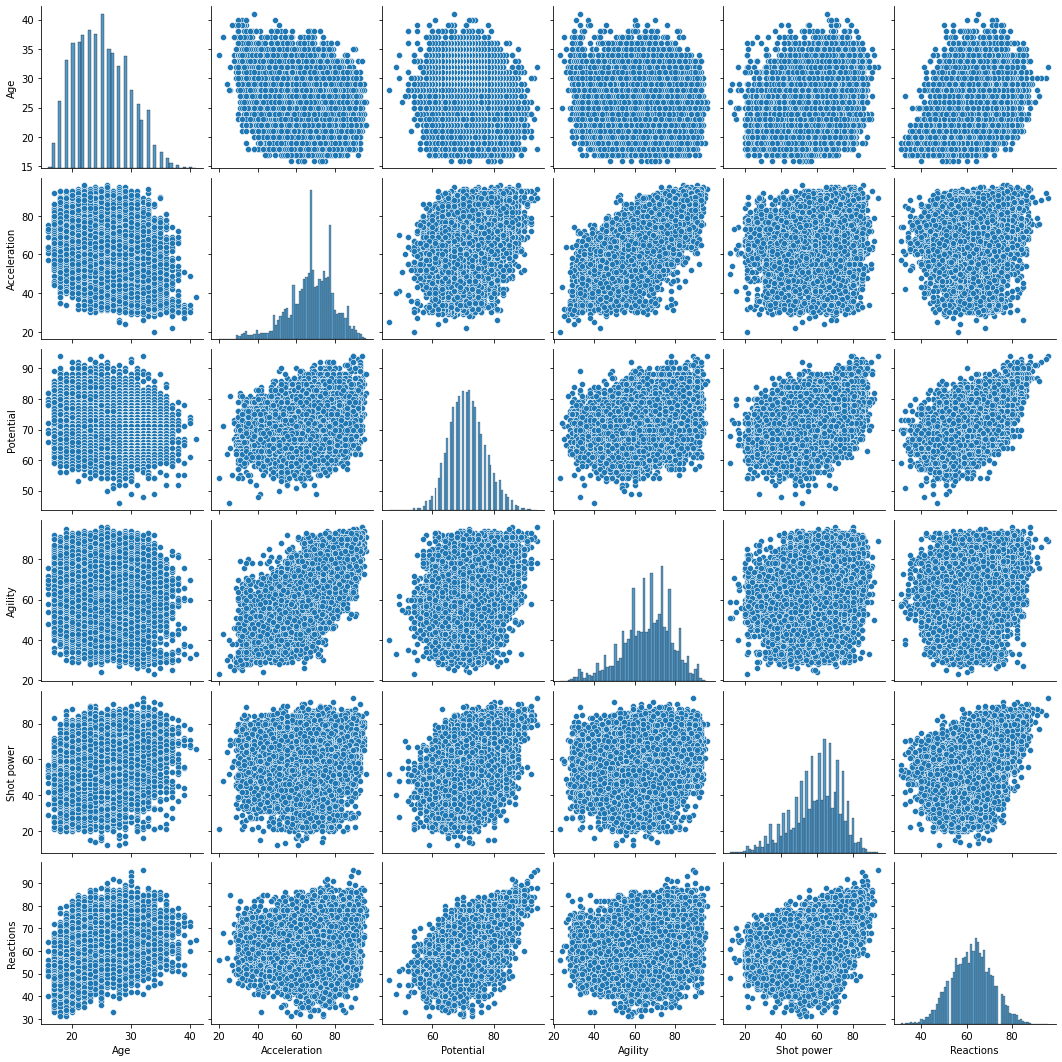

In [667]:
sns.pairplot(df_subset)
plt.show() #using Matplotlib to show the plot


In [668]:
corr = df_subset.corr()
corr.style.background_gradient(cmap='coolwarm')

,Age,Acceleration,Potential,Agility,Shot power,Reactions
Age,1.000000,-0.187582,-0.226001,-0.009130,0.300198,0.469362
Acceleration,-0.187582,1.000000,0.245444,0.718436,0.213002,0.130824
Potential,-0.226001,0.245444,1.000000,0.222342,0.340180,0.509793
Agility,-0.009130,0.718436,0.222342,1.000000,0.329815,0.251023
Shot power,0.300198,0.213002,0.340180,0.329815,1.000000,0.500203
Reactions,0.469362,0.130824,0.509793,0.251023,0.500203,1.000000


Mean acceleration is: 67.81288659793815 acceleration
Median acceleration is: 69.0 acceleration
Standard deviation of the acceleration is: 11.885765935508767 acceleration


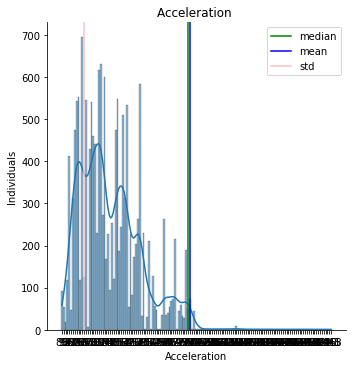

In [669]:
mean = df_subset['Acceleration'].mean()
median = df_subset['Acceleration'].median()
std = np.std(df_subset['Acceleration'])

print(f'Mean acceleration is: {mean} acceleration')
print(f'Median acceleration is: {median} acceleration')
print(f'Standard deviation of the acceleration is: {std} acceleration')

sns.displot(df['Acceleration'], kde=True)
plt.title('Acceleration ')
plt.ylabel('Individuals')
plt.axvline(mean, color='green', label='median') #This adds a vertical line at x-position median_size, from y = 0 to y = 100 
plt.axvline(median, color='blue', label='mean') 
plt.axvline(std, color='pink', label='std') 
plt.legend() #This adds a legend. It works automatically because I've set the labels in the previous lines
plt.show()

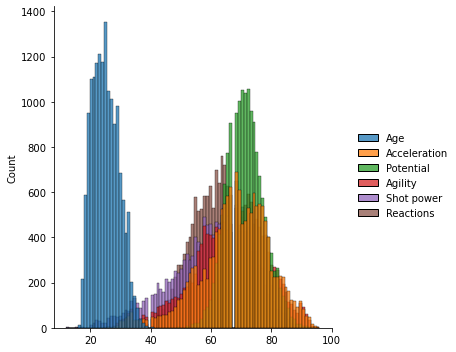

In [670]:
sns.displot(data=df_subset)

##### We can characterize the distribution as follows:
* Normality: the distribution is not normal at all (it's the curve). Most values are [x].
* Variation: there is little variation. Most values are [x].
* Modality: there is one peak
* Skewness: the distribution is skewed to the right. However, most values are 0 so the skew is minimal.
* Outliers: there are not really outliers. There are no values that are very far from the trend.

The mean Agility is: 66.22338917525774
The median Agility is: 67.0
The standard Agility is: 12.511717471254906


/Users/stefanvanbrummelen/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


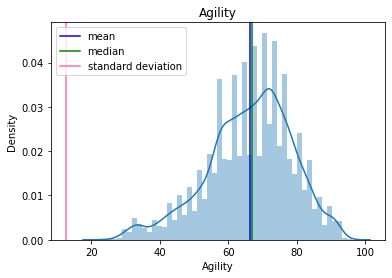

In [671]:
mean = df_subset["Agility"].mean()
median = df_subset["Agility"].median()
std = np.std(df_subset["Agility"])

print(f"The mean Agility is: {mean}")
print(f"The median Agility is: {median}")
print(f"The standard Agility is: {std}")

sns.distplot(df_subset["Agility"], kde=True)
plt.title("Agility")
plt.axvline(mean, 0, 100, color='blue', label='mean')
plt.axvline(median, 0, 100, color='green', label='median')
plt.axvline(std, 0, 100, color='hotpink', label='standard deviation')
plt.legend()
plt.show()


The mean accelerations are: 67.81288659793815
The median accelerations are: 69.0
The standard deviation accelerations are: 11.885765935508767


/Users/stefanvanbrummelen/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


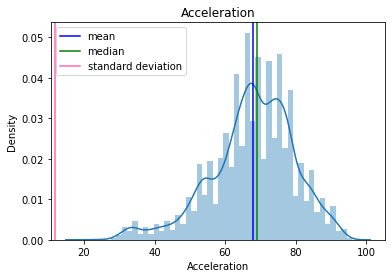

In [672]:
mean = df_subset["Acceleration"].mean()
median = df_subset["Acceleration"].median()
std = np.std(df_subset["Acceleration"])

print(f"The mean accelerations are: {mean}")
print(f"The median accelerations are: {median}")
print(f"The standard deviation accelerations are: {std}")

sns.distplot(df_subset["Acceleration"], kde=True)
plt.title("Acceleration")
plt.axvline(mean, 0, 100, color='blue', label='mean')
plt.axvline(median, 0, 100, color='green', label='median')
plt.axvline(std, 0, 100, color='hotpink', label='standard deviation')
plt.legend()
plt.show()

<AxesSubplot:xlabel='Acceleration', ylabel='Agility'>

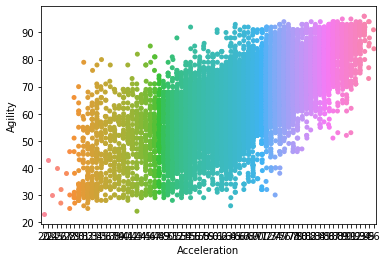

In [683]:
sns.stripplot(x= df_subset["Acceleration"] , y=df_subset["Agility"])

The stripplot shows the acceleration in ratio to the agility. 

### k-nearest neighbor




In [674]:
df_subset['Preferred Positions'] = df_subset['Preferred Positions'].str.split()
df_subset['Preferred Positions'] = df_subset['Preferred Positions'].explode(['Preferred Positions'])
df_subset_dummies = pd.get_dummies(df_subset['Preferred Positions'])
df_subset_dummies = pd.concat([df_subset, df_subset_dummies], axis=1)
df_subset_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15520 entries, 0 to 17980
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Name                 15520 non-null  string
 1   Age                  15520 non-null  int64 
 2   Acceleration         15520 non-null  int64 
 3   Potential            15520 non-null  int64 
 4   Agility              15520 non-null  int64 
 5   Shot power           15520 non-null  int64 
 6   Reactions            15520 non-null  int64 
 7   Preferred Positions  15520 non-null  object
 8   CAM                  15520 non-null  uint8 
 9   CB                   15520 non-null  uint8 
 10  CDM                  15520 non-null  uint8 
 11  CF                   15520 non-null  uint8 
 12  CM                   15520 non-null  uint8 
 13  LB                   15520 non-null  uint8 
 14  LM                   15520 non-null  uint8 
 15  LW                   15520 non-null  uint8 
 16  LWB 

In [675]:
df_subset_dummies['Preferred Positions_string'] = df_subset['Preferred Positions']
df_subset_dummies['Preferred Positions'] = df_subset_dummies['Preferred Positions'].astype('category').cat.codes
df_subset_dummies[['Preferred Positions','Preferred Positions_string']].value_counts().sort_values() #see how the numeric values correspond to the string values
df_subset_dummies

,Name,Age,Acceleration,Potential,Agility,Shot power,Reactions,Preferred Positions,CAM,CB,CDM,CF,CM,LB,LM,LW,LWB,RB,RM,RW,RWB,ST,Preferred Positions_string
0,Cristiano Ronaldo,32,89,94,89,94,96,13,0,0,0,0,0,0,0,0,0,0,0,0,0,1,ST
1,L. Messi,30,92,93,90,85,95,7,0,0,0,0,0,0,0,1,0,0,0,0,0,0,LW
2,Neymar,25,94,94,96,80,88,11,0,0,0,0,0,0,0,0,0,0,0,1,0,0,RW
3,L. Suárez,30,88,92,86,87,93,7,0,0,0,0,0,0,0,1,0,0,0,0,0,0,LW
5,R. Lewandowski,28,79,91,78,88,91,13,0,0,0,0,0,0,0,0,0,0,0,0,0,1,ST
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17974,J. Keeble,18,66,56,45,30,48,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,CDM
17975,T. Käßemodel,28,25,46,40,52,47,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,CB
17978,J. Young,17,66,61,60,42,54,9,0,0,0,0,0,0,0,0,0,1,0,0,0,0,RB
17979,J. Lundstram,18,57,64,58,43,49,10,0,0,0,0,0,0,0,0,0,0,1,0,0,0,RM


In [676]:
from sklearn.preprocessing import normalize #get the function needed to normalize our data.

X = df_subset_dummies[['Acceleration', 'Potential', 'Agility', 'Shot power', 'Reactions']] #create the X matrix
y = df_subset_dummies['Preferred Positions'] #create the y-variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data, store it into different variables
X_train

,Acceleration,Potential,Agility,Shot power,Reactions
10303,50,68,35,51,58
14100,67,66,62,57,53
1936,76,75,75,72,72
9738,48,66,43,58,55
9720,48,68,44,44,58
...,...,...,...,...,...
1050,90,79,91,75,68
5904,85,69,84,72,66
13908,62,61,59,52,58
271,84,82,81,76,83


In [677]:
from sklearn.neighbors import KNeighborsClassifier #the object class we need

knn = KNeighborsClassifier(n_neighbors=5) #create a KNN-classifier with 5 neighbors (default)
knn = knn.fit(X_train, y_train) #this fits the k-nearest neigbor model with the train data
knn.score(X_test, y_test) #calculate the fit on the test data


0.11361683848797251

11,3% of the preferred position is predicted accurately.

Calculate the accuracy, precision and recall. Describe and interpret the results in a Markdown cell.

In [678]:
from sklearn.metrics import confusion_matrix
y_test_pred = knn.predict(X_test) #the predicted values
cm = confusion_matrix(y_test, y_test_pred) #creates a "confusion matrix"
cm

array([[ 92,  91,  42,   1,  52,  17,  32,   4,   0,  10,  27,   7,   0,
         33],
       [146, 144,  70,   5,  85,  25,  53,   3,   0,  19,  30,   3,   1,
         34],
       [ 97, 117,  58,   4,  67,  32,  42,   2,   0,  15,  33,   3,   1,
         48],
       [ 15,  14,   8,   0,   8,   7,   3,   0,   0,   4,   4,   0,   0,
         10],
       [124, 141,  80,   3,  90,  20,  35,   6,   0,  26,  35,   2,   1,
         50],
       [ 58,  65,  27,   3,  53,   9,  22,   4,   0,  12,  10,   1,   1,
         25],
       [ 97, 111,  54,   2,  45,  18,  35,   3,   1,  20,  23,   1,   0,
         34],
       [ 27,  33,  21,   4,  17,   2,   8,   0,   0,   4,   4,   2,   0,
         10],
       [  8,   9,   5,   1,   3,   2,   5,   0,   0,   0,   5,   2,   0,
          5],
       [ 71,  86,  34,   0,  34,  13,  28,   1,   0,  16,  28,   3,   0,
         23],
       [ 79,  94,  46,   2,  65,  21,  25,   4,   0,  22,  32,   1,   0,
         44],
       [ 32,  36,  14,   2,  16,   8,  13, 

In [679]:
conf_matrix = pd.DataFrame(cm, index=['CAM', 'CB', 'CDM', 'CF', 'CM', 'LB','LM','LW','LWB','RB','RM','RW','RWB','ST'], columns = ['CAM_pred', 'CB_pred', 'CDM_pred', 'CF_pred', 'CM_pred', 'LB_pred','LM_pred','LW_pred','LWB_pred','RB_pred','RM_pred','RW_pred','RWB_pred','ST_pred']) 
conf_matrix

,CAM_pred,CB_pred,CDM_pred,CF_pred,CM_pred,LB_pred,LM_pred,LW_pred,LWB_pred,RB_pred,RM_pred,RW_pred,RWB_pred,ST_pred
CAM,92,91,42,1,52,17,32,4,0,10,27,7,0,33
CB,146,144,70,5,85,25,53,3,0,19,30,3,1,34
CDM,97,117,58,4,67,32,42,2,0,15,33,3,1,48
CF,15,14,8,0,8,7,3,0,0,4,4,0,0,10
CM,124,141,80,3,90,20,35,6,0,26,35,2,1,50
LB,58,65,27,3,53,9,22,4,0,12,10,1,1,25
LM,97,111,54,2,45,18,35,3,1,20,23,1,0,34
LW,27,33,21,4,17,2,8,0,0,4,4,2,0,10
LWB,8,9,5,1,3,2,5,0,0,0,5,2,0,5
RB,71,86,34,0,34,13,28,1,0,16,28,3,0,23


calculate recall, precision for the CAM

$recall = \frac{92}{92+91+42+1+52+17+32+4+0+10+27+7+0+33} = .22$

$precision = \frac{92}{48+25+41} = .10$


In [680]:
recall_CAM = (conf_matrix['CAM_pred'][0])/conf_matrix.sum(axis=0)['CAM_pred']
recall_CB = (conf_matrix['CB_pred'][1])/conf_matrix.sum(axis=0)['CB_pred']
recall_CDM = (conf_matrix['CDM_pred'][2])/conf_matrix.sum(axis=0)['CDM_pred']
recall_CF = (conf_matrix['CF_pred'][4])/conf_matrix.sum(axis=0)['CF_pred']
recall_CM = (conf_matrix['CM_pred'][5])/conf_matrix.sum(axis=0)['CM_pred']
recall_LB = (conf_matrix['LB_pred'][5])/conf_matrix.sum(axis=0)['LB_pred']
recall_LM = (conf_matrix['LM_pred'][6])/conf_matrix.sum(axis=0)['LM_pred']
recall_LW = (conf_matrix['LW_pred'][7])/conf_matrix.sum(axis=0)['LW_pred']
recall_LWB = (conf_matrix['LWB_pred'][8])/conf_matrix.sum(axis=0)['LWB_pred']
recall_RB = (conf_matrix['RB_pred'][9])/conf_matrix.sum(axis=0)['RB_pred']
recall_RM = (conf_matrix['RM_pred'][10])/conf_matrix.sum(axis=0)['RM_pred']
recall_RW = (conf_matrix['RW_pred'][11])/conf_matrix.sum(axis=0)['RW_pred']
recall_RWB = (conf_matrix['RWB_pred'][12])/conf_matrix.sum(axis=0)['RWB_pred']
recall_ST = (conf_matrix['ST_pred'][13])/conf_matrix.sum(axis=0)['ST_pred']
print("Recalls: "
"CAM", recall_CAM.round(2), 
"CB", recall_CB.round(2), 
"CDM", recall_CAM.round(2), 
"CF", recall_CF.round(2),
"CM", recall_CM.round(2),
"LB", recall_LB.round(2),
"LM", recall_LM.round(2),
"LW", recall_LW.round(2),
"LWB", recall_LWB.round(2),
"RB", recall_RB.round(2),
"RM", recall_RM.round(2),
"RW", recall_RW.round(2),
"RWB", recall_RWB.round(2),
"ST", recall_ST.round(2),
)


Recalls: CAM 0.1 CB 0.13 CDM 0.1 CF 0.1 CM 0.09 LB 0.04 LM 0.1 LW 0.0 LWB 0.0 RB 0.09 RM 0.12 RW 0.06 RWB 0.0 ST 0.13


In [681]:
precision_CAM = (conf_matrix['CAM_pred'][0])/conf_matrix.sum(axis=1)['CAM']
precision_CB = (conf_matrix['CB_pred'][1])/conf_matrix.sum(axis=1)['CB']
precision_CDM = (conf_matrix['CDM_pred'][2])/conf_matrix.sum(axis=1)['CDM']
precision_CF = (conf_matrix['CF_pred'][4])/conf_matrix.sum(axis=1)['CF']
precision_CM = (conf_matrix['CM_pred'][5])/conf_matrix.sum(axis=1)['CM']
precision_LB = (conf_matrix['LB_pred'][5])/conf_matrix.sum(axis=1)['LB']
precision_LM = (conf_matrix['LM_pred'][6])/conf_matrix.sum(axis=1)['LM']
precision_LW = (conf_matrix['LW_pred'][7])/conf_matrix.sum(axis=1)['LW']
precision_LWB = (conf_matrix['LWB_pred'][8])/conf_matrix.sum(axis=1)['LWB']
precision_RB = (conf_matrix['RB_pred'][9])/conf_matrix.sum(axis=1)['RB']
precision_RM = (conf_matrix['RM_pred'][10])/conf_matrix.sum(axis=1)['RM']
precision_RW = (conf_matrix['RW_pred'][11])/conf_matrix.sum(axis=1)['RW']
precision_RWB = (conf_matrix['RWB_pred'][12])/conf_matrix.sum(axis=1)['RWB']
precision_ST = (conf_matrix['ST_pred'][13])/conf_matrix.sum(axis=1)['ST']
print("Recalls: "
"CAM", precision_CAM.round(2), 
"CB", precision_CB.round(2), 
"CDM", precision_CAM.round(2), 
"CF", precision_CF.round(2),
"CM", precision_CM.round(2),
"LB", precision_LB.round(2),
"LM", precision_LM.round(2),
"LW", precision_LW.round(2),
"LWB", precision_LWB.round(2),
"RB", precision_RB.round(2),
"RM", precision_RM.round(2),
"RW", precision_RW.round(2),
"RWB", precision_RWB.round(2),
"ST", precision_ST.round(2),
)

Recalls: CAM 0.23 CB 0.23 CDM 0.23 CF 0.04 CM 0.09 LB 0.03 LM 0.08 LW 0.0 LWB 0.0 RB 0.05 RM 0.07 RW 0.01 RWB 0.0 ST 0.09
